In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.cluster import KMeans
import plotly.graph_objects as go

In [2]:
df = pd.read_excel('H_EXPORTACAO_E IMPORTACAO_POR MUNICIPIO_2021-01_2023-12_DT20240618 (1).xlsx')

In [3]:
df.head()

,Mês,Município,Código SH2,Descrição SH2,Código SH4,Descrição SH4,Bloco Econômico,Exportação - 2023 - Valor US$ FOB,Importação - 2023 - Valor US$ FOB,Exportação - 2022 - Valor US$ FOB,Importação - 2022 - Valor US$ FOB,Exportação - 2021 - Valor US$ FOB,Importação - 2021 - Valor US$ FOB
0,12. Dezembro,Campinas - SP,8,Frutas; cascas de frutos cítricos e de melões,804,"Tâmaras, figos, ananases (abacaxis), abacates,...",América do Norte,70107,0,54944,0,93179,0
1,12. Dezembro,Campinas - SP,8,Frutas; cascas de frutos cítricos e de melões,804,"Tâmaras, figos, ananases (abacaxis), abacates,...",Europa,636503,0,511756,0,987453,0
2,12. Dezembro,Campinas - SP,8,Frutas; cascas de frutos cítricos e de melões,804,"Tâmaras, figos, ananases (abacaxis), abacates,...",Oriente Médio,7026,0,6002,0,0,0
3,12. Dezembro,Campinas - SP,8,Frutas; cascas de frutos cítricos e de melões,804,"Tâmaras, figos, ananases (abacaxis), abacates,...",União Europeia - UE,570878,0,464762,0,925547,0
4,12. Dezembro,Campinas - SP,8,Frutas; cascas de frutos cítricos e de melões,805,"Citrinos, frescos ou secos",Europa,55048,232806,0,157879,3031,101111


In [4]:
df.head()

,Mês,Município,Código SH2,Descrição SH2,Código SH4,Descrição SH4,Bloco Econômico,Exportação - 2023 - Valor US$ FOB,Importação - 2023 - Valor US$ FOB,Exportação - 2022 - Valor US$ FOB,Importação - 2022 - Valor US$ FOB,Exportação - 2021 - Valor US$ FOB,Importação - 2021 - Valor US$ FOB
0,12. Dezembro,Campinas - SP,8,Frutas; cascas de frutos cítricos e de melões,804,"Tâmaras, figos, ananases (abacaxis), abacates,...",América do Norte,70107,0,54944,0,93179,0
1,12. Dezembro,Campinas - SP,8,Frutas; cascas de frutos cítricos e de melões,804,"Tâmaras, figos, ananases (abacaxis), abacates,...",Europa,636503,0,511756,0,987453,0
2,12. Dezembro,Campinas - SP,8,Frutas; cascas de frutos cítricos e de melões,804,"Tâmaras, figos, ananases (abacaxis), abacates,...",Oriente Médio,7026,0,6002,0,0,0
3,12. Dezembro,Campinas - SP,8,Frutas; cascas de frutos cítricos e de melões,804,"Tâmaras, figos, ananases (abacaxis), abacates,...",União Europeia - UE,570878,0,464762,0,925547,0
4,12. Dezembro,Campinas - SP,8,Frutas; cascas de frutos cítricos e de melões,805,"Citrinos, frescos ou secos",Europa,55048,232806,0,157879,3031,101111


In [5]:
df.shape

(312, 13)

In [6]:
# valores na
df.isna().sum()

Mês                                  0
Município                            0
Código SH2                           0
Descrição SH2                        0
Código SH4                           0
Descrição SH4                        0
Bloco Econômico                      0
Exportação - 2023 - Valor US$ FOB    0
Importação - 2023 - Valor US$ FOB    0
Exportação - 2022 - Valor US$ FOB    0
Importação - 2022 - Valor US$ FOB    0
Exportação - 2021 - Valor US$ FOB    0
Importação - 2021 - Valor US$ FOB    0
dtype: int64

In [7]:
# valores null
df.isnull().sum()

Mês                                  0
Município                            0
Código SH2                           0
Descrição SH2                        0
Código SH4                           0
Descrição SH4                        0
Bloco Econômico                      0
Exportação - 2023 - Valor US$ FOB    0
Importação - 2023 - Valor US$ FOB    0
Exportação - 2022 - Valor US$ FOB    0
Importação - 2022 - Valor US$ FOB    0
Exportação - 2021 - Valor US$ FOB    0
Importação - 2021 - Valor US$ FOB    0
dtype: int64

In [8]:
df.describe()

,Código SH2,Código SH4,Exportação - 2023 - Valor US$ FOB,Importação - 2023 - Valor US$ FOB,Exportação - 2022 - Valor US$ FOB,Importação - 2022 - Valor US$ FOB,Exportação - 2021 - Valor US$ FOB,Importação - 2021 - Valor US$ FOB
count,312.0,312.000000,312.000000,3.120000e+02,312.000000,312.000000,312.000000,312.000000
mean,8.0,807.298077,24634.833333,7.849272e+04,21540.435897,58805.878205,28430.041667,53682.105769
std,0.0,3.303160,86152.914458,1.533980e+05,68204.117097,101683.887882,100449.955199,81937.200554
min,8.0,801.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,8.0,805.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,8.0,808.000000,0.000000,1.140400e+04,0.000000,0.000000,0.000000,5304.000000
75%,8.0,810.000000,398.250000,1.001710e+05,0.000000,77829.750000,1400.000000,92747.000000
max,8.0,814.000000,636503.000000,1.008618e+06,511756.000000,637944.000000,987453.000000,612379.000000


## Importação e exportação dos produtos ao longo dos anos (2021 - 2023)

In [9]:
fig = px.bar(df, x=df['Mês'], y=df['Importação - 2021 - Valor US$ FOB'], title='Importação ao longo de 2021', color=df["Código SH4"])

# Mostrando o gráfico 
fig.show()

In [10]:
fig = px.bar(df, x=df['Mês'], y=df['Exportação - 2021 - Valor US$ FOB'], title='Exportação ao longo de 2021', color=df["Código SH4"])
# Mostrando o gráfico 

fig.show()

In [11]:
fig = px.pie(df, values=df['Importação - 2021 - Valor US$ FOB'], names=df['Mês'], title='Importação ao longo de 2021')
fig.show()

In [12]:
fig = px.pie(df, values=df['Exportação - 2021 - Valor US$ FOB'], names=df['Mês'], title='Exportação ao longo de 2021')
fig.show()

In [13]:
fig = px.bar(df, x=df['Mês'], y=df['Importação - 2022 - Valor US$ FOB'], title='Importação ao longo de 2022', color=df["Código SH4"])

# Mostrando o gráfico 
fig.show()

In [14]:
fig = px.bar(df, x=df['Mês'], y=df['Exportação - 2022 - Valor US$ FOB'], title='Exportação ao longo de 2022', color=df["Código SH4"])

# Mostrando o gráfico 
fig.show()

In [15]:
fig = px.pie(df, values=df['Importação - 2022 - Valor US$ FOB'], names=df['Mês'], title='Importação ao longo de 2022')
fig.show()

In [16]:
fig = px.pie(df, values=df['Exportação - 2022 - Valor US$ FOB'], names=df['Mês'], title='Exportação ao longo de 2022')
fig.show()

In [17]:
fig = px.bar(df, x=df['Mês'], y=df['Importação - 2023 - Valor US$ FOB'], title='Importação ao longo de 2023', color=df["Código SH4"])

# Mostrando o gráfico 
fig.show()


In [18]:
fig = px.bar(df, x=df['Mês'], y=df['Exportação - 2023 - Valor US$ FOB'], title='Exportação ao longo de 2023', color=df["Código SH4"])

# Mostrando o gráfico 
fig.show()

In [19]:
fig = px.pie(df, values=df['Importação - 2023 - Valor US$ FOB'], names=df['Mês'], title='Importação ao longo de 2023')
fig.show()

In [20]:
fig = px.pie(df, values=df['Exportação - 2023 - Valor US$ FOB'], names=df['Mês'], title='Exportação ao longo de 2023')
fig.show()

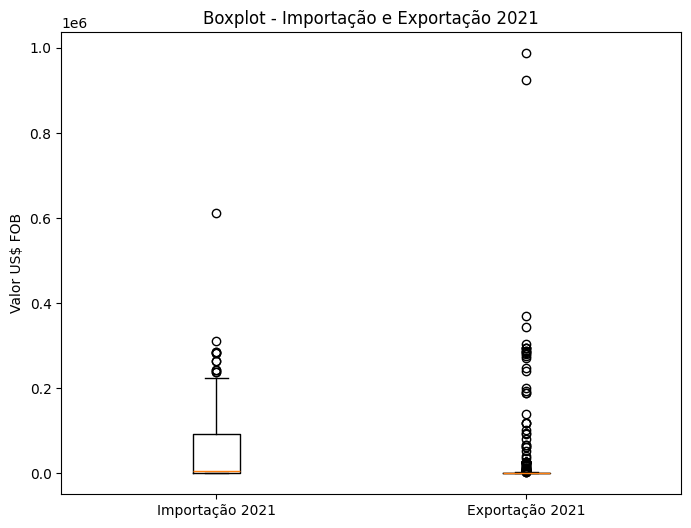

In [21]:
filtro = [
    df['Importação - 2021 - Valor US$ FOB'],
    df['Exportação - 2021 - Valor US$ FOB']
]

plt.figure(figsize=(8, 6))
plt.boxplot(filtro, labels=['Importação 2021', 'Exportação 2021'])
plt.title('Boxplot - Importação e Exportação 2021')
plt.ylabel('Valor US$ FOB')
plt.show()

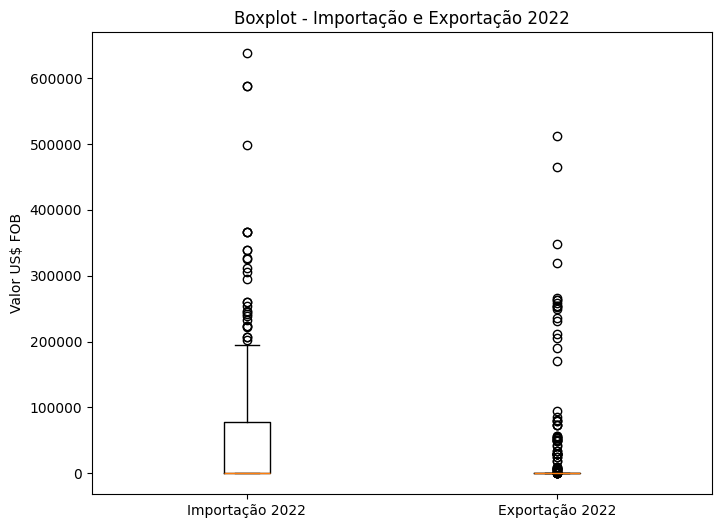

In [22]:
filtro = [
    df['Importação - 2022 - Valor US$ FOB'],
    df['Exportação - 2022 - Valor US$ FOB']
]

plt.figure(figsize=(8, 6))
plt.boxplot(filtro, labels=['Importação 2022', 'Exportação 2022'])
plt.title('Boxplot - Importação e Exportação 2022')
plt.ylabel('Valor US$ FOB')
plt.show()

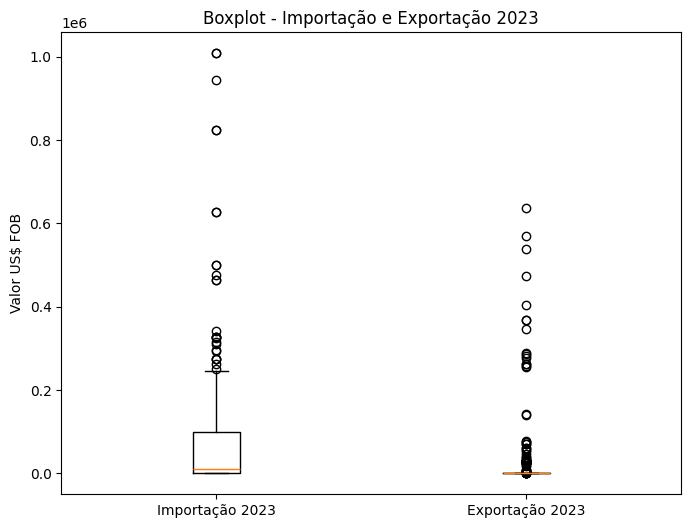

In [23]:
filtro = [
    df['Importação - 2023 - Valor US$ FOB'],
    df['Exportação - 2023 - Valor US$ FOB']
]

plt.figure(figsize=(8, 6))
plt.boxplot(filtro, labels=['Importação 2023', 'Exportação 2023'])
plt.title('Boxplot - Importação e Exportação 2023')
plt.ylabel('Valor US$ FOB')
plt.show()

In [24]:
# vendo blocos econômicos
df['Bloco Econômico'].value_counts()

Bloco Econômico
Europa                                73
União Europeia - UE                   70
América do Sul                        58
Mercado Comum do Sul - Mercosul       46
América do Norte                      26
África                                12
Oriente Médio                          9
Comunidade Andina das Nações - CAN     8
Oceania                                7
Ásia (Exclusive Oriente Médio)         3
Name: count, dtype: int64

In [25]:
# importacoes e exportacoes de cada bloco economico 2021
exportacoes_2021 = df.groupby('Bloco Econômico')['Exportação - 2021 - Valor US$ FOB'].sum().reset_index()
importacoes_2021 = df.groupby('Bloco Econômico')['Importação - 2021 - Valor US$ FOB'].sum().reset_index()


# importacoes e exportacoes de cada bloco economico 2022
exportacoes_2022 = df.groupby('Bloco Econômico')['Exportação - 2022 - Valor US$ FOB'].sum().reset_index()
importacoes_2022 = df.groupby('Bloco Econômico')['Importação - 2022 - Valor US$ FOB'].sum().reset_index()


# importacoes e exportacoes de cada bloco economico 2023 
exportacoes_2023 = df.groupby('Bloco Econômico')['Exportação - 2023 - Valor US$ FOB'].sum().reset_index()
importacoes_2023 = df.groupby('Bloco Econômico')['Importação - 2023 - Valor US$ FOB'].sum().reset_index()

In [26]:
# usando bibllioteca para aderir os países
mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/l3/lb20j__s1mbbnmdc5xn1zg6h0000gn/T/ipykernel_23729/2403655973.py:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [27]:

blocoeconomico_dict = {
    'Europa': [
        'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
        'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany',
        'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania',
        'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland',
        'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
        'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City'
    ],
    'União Europeia - UE': [
        'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France',
        'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
        'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'
    ],
    'América do Sul': [
        'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
    ],
    'Mercado Comum do Sul - Mercosul': ['Argentina', 'Brazil', 'Paraguay', 'Uruguay'],
    'América do Norte': ['Canada', 'Mexico', 'United States'],
    'África': [
        'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 
        'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 
        'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 
        'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 
        'Republic of the Congo', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 
        'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
    ],
    'Oriente Médio': [
        'Bahrain', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 
        'United Arab Emirates', 'Yemen'
    ],
    'Comunidade Andina das Nações - CAN': ['Bolivia', 'Colombia', 'Ecuador', 'Peru'],
    'Oceania': [
        'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 
        'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'
    ],
    'Ásia (Exclusive Oriente Médio)': [
        'Afghanistan', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Georgia', 'India', 
        'Indonesia', 'Japan', 'Kazakhstan', 'Kyrgyzstan', 'Laos', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 
        'North Korea', 'Pakistan', 'Philippines', 'Singapore', 'South Korea', 'Sri Lanka', 'Tajikistan', 'Thailand', 
        'Timor-Leste', 'Turkmenistan', 'Uzbekistan', 'Vietnam'
    ]
}

In [28]:
def get_countries(bloco):
    return blocoeconomico_dict.get(bloco, [])

def create_geodf(df, value_column):
    geo_data = []
    for index, row in df.iterrows():
        bloco = row['Bloco Econômico']
        countries = get_countries(bloco)
        for country in countries:
            country_geo = mundo[mundo['name'] == country]
            if not country_geo.empty:
                geo_data.append({
                    'geometry': country_geo.geometry.values[0],
                    'value': row[value_column]
                })
    return gpd.GeoDataFrame(geo_data)


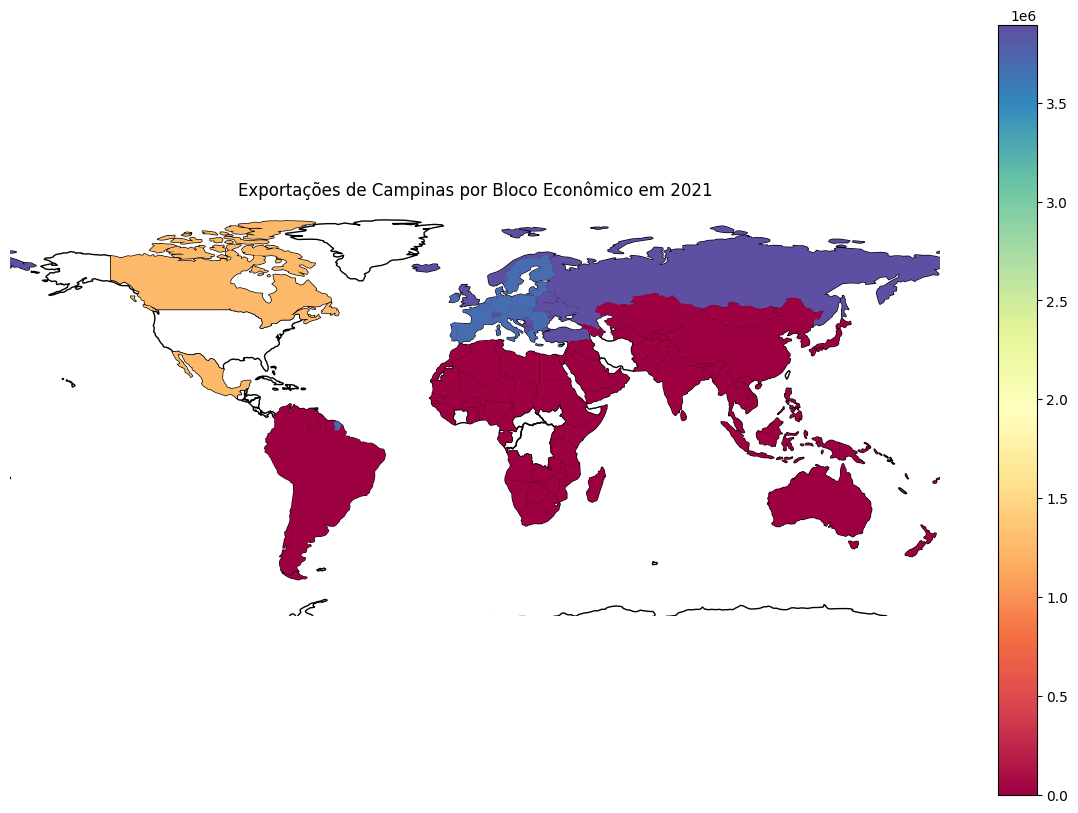

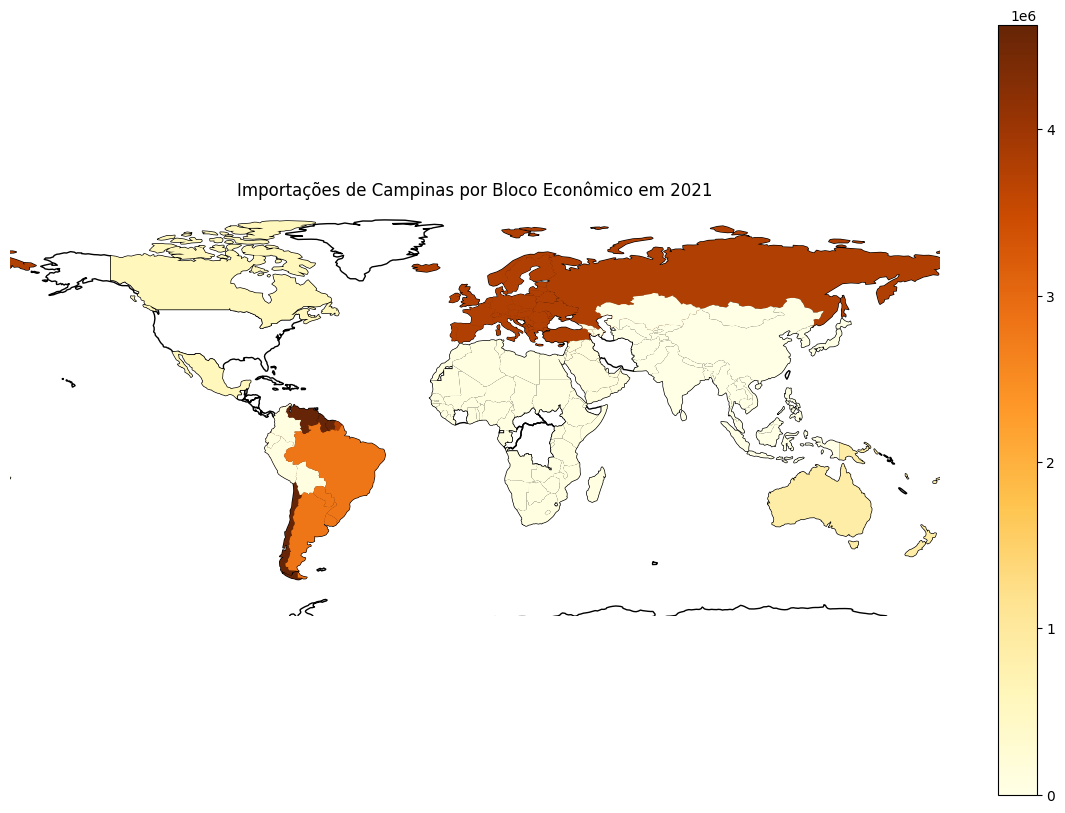

In [29]:

gdf_exportacoes = create_geodf(exportacoes_2021, 'Exportação - 2021 - Valor US$ FOB')
gdf_importacoes = create_geodf(importacoes_2021, 'Importação - 2021 - Valor US$ FOB')

#  vendo exportações 
ax = gplt.polyplot(mundo, projection=gcrs.PlateCarree(), figsize=(15, 10))
gplt.choropleth(
    gdf_exportacoes,
    hue='value',
    cmap='Spectral',
    legend=True,
    ax=ax
)
plt.title('Exportações de Campinas por Bloco Econômico em 2021')
plt.show()

# vendo importações
ax = gplt.polyplot(mundo, projection=gcrs.PlateCarree(), figsize=(15, 10))
gplt.choropleth(
    gdf_importacoes,
    hue='value',
    cmap='YlOrBr',
    legend=True,
    ax=ax
)
plt.title('Importações de Campinas por Bloco Econômico em 2021')
plt.show()

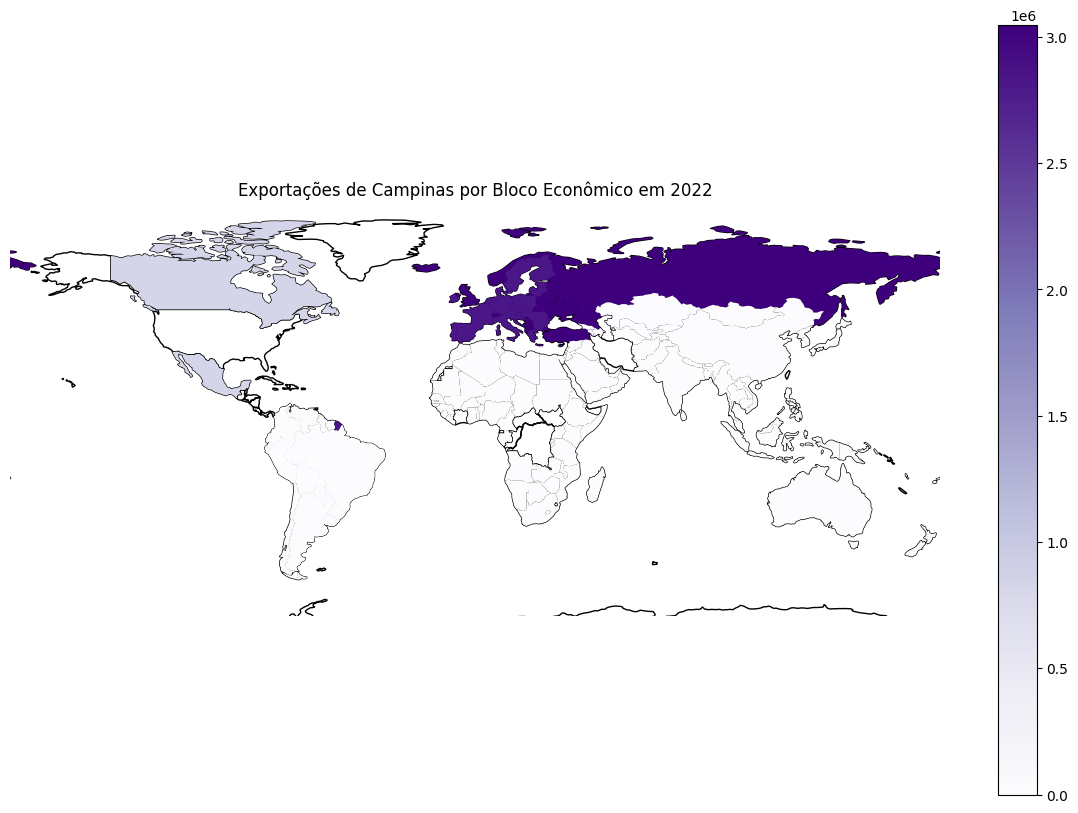

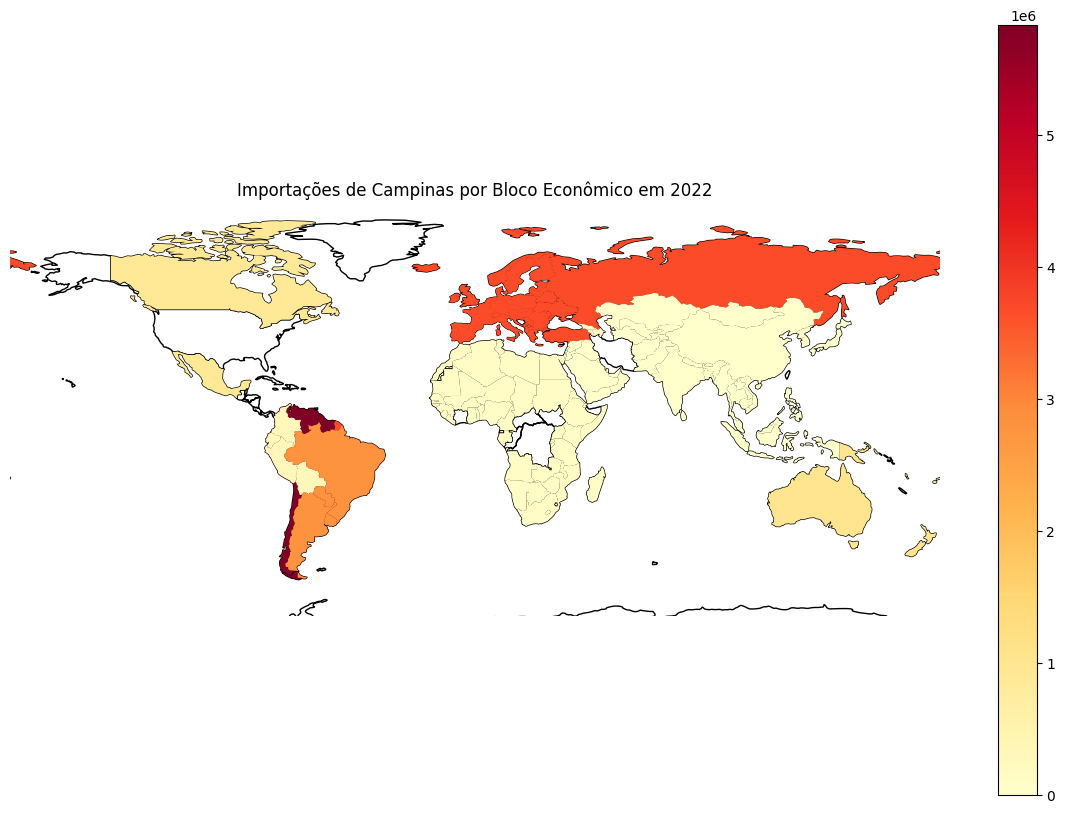

In [30]:

gdf_exportacoes = create_geodf(exportacoes_2022, 'Exportação - 2022 - Valor US$ FOB')
gdf_importacoes = create_geodf(importacoes_2022, 'Importação - 2022 - Valor US$ FOB')

#  vendo exportações 
ax = gplt.polyplot(mundo, projection=gcrs.PlateCarree(), figsize=(15, 10))
gplt.choropleth(
    gdf_exportacoes,
    hue='value',
    cmap='Purples',
    legend=True,
    ax=ax
)
plt.title('Exportações de Campinas por Bloco Econômico em 2022')
plt.show()

# vendo importações
ax = gplt.polyplot(mundo, projection=gcrs.PlateCarree(), figsize=(15, 10))
gplt.choropleth(
    gdf_importacoes,
    hue='value',
    cmap='YlOrRd',
    legend=True,
    ax=ax
)
plt.title('Importações de Campinas por Bloco Econômico em 2022')
plt.show()

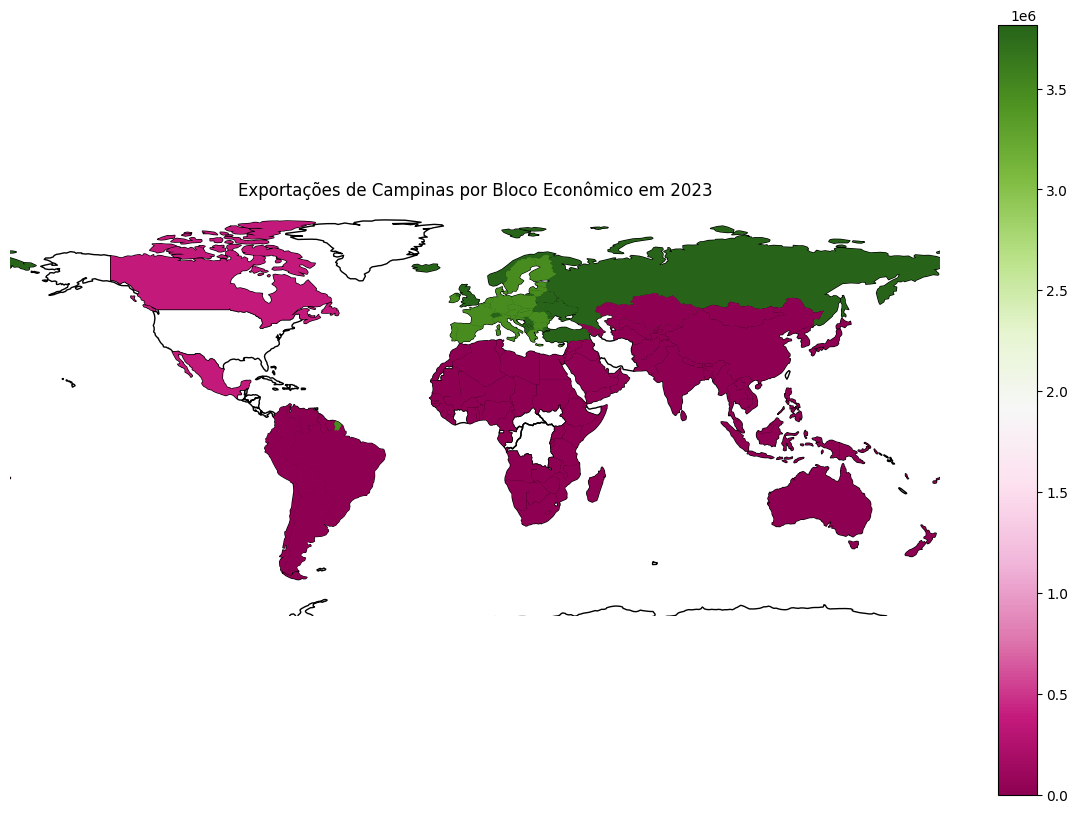

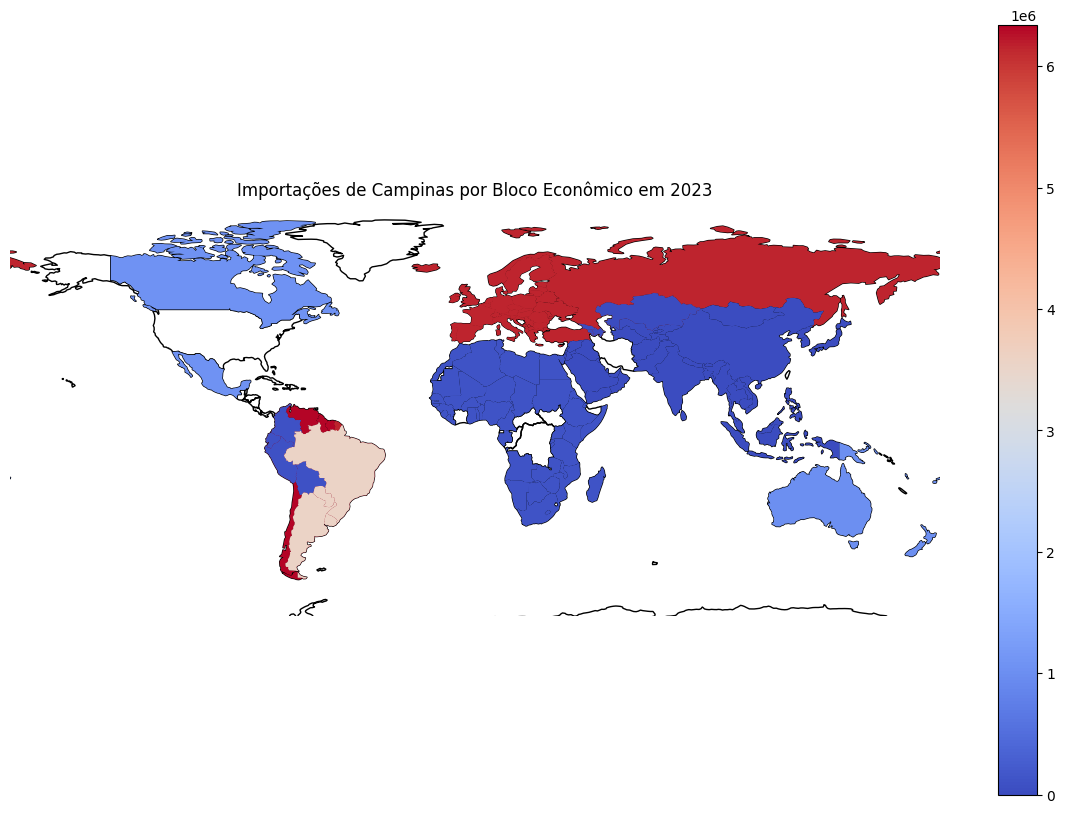

In [31]:

gdf_exportacoes = create_geodf(exportacoes_2023, 'Exportação - 2023 - Valor US$ FOB')
gdf_importacoes = create_geodf(importacoes_2023, 'Importação - 2023 - Valor US$ FOB')

#  vendo exportações 
ax = gplt.polyplot(mundo, projection=gcrs.PlateCarree(), figsize=(15, 10))
gplt.choropleth(
    gdf_exportacoes,
    hue='value',
    cmap='PiYG',
    legend=True,
    ax=ax
)
plt.title('Exportações de Campinas por Bloco Econômico em 2023')
plt.show()

# vendo importações
ax = gplt.polyplot(mundo, projection=gcrs.PlateCarree(), figsize=(15, 10))
gplt.choropleth(
    gdf_importacoes,
    hue='value',
    cmap='coolwarm',
    legend=True,
    ax=ax
)
plt.title('Importações de Campinas por Bloco Econômico em 2023')
plt.show()

## Frutas mais importadas e exportas por bloco econômico (2021 a 2023)

In [32]:
fig = px.bar(df, x=df['Importação - 2021 - Valor US$ FOB'], y=df['Bloco Econômico'], title='Importação ao longo de 2021', color=df["Código SH4"], 
             orientation='h')

# Mostrando o gráfico 
fig.show()

In [33]:
fig = px.bar(df, x=df['Exportação - 2021 - Valor US$ FOB'], y=df['Bloco Econômico'], title='Exportação ao longo de 2021', color=df["Código SH4"], 
             orientation='h')

# Mostrando o gráfico 
fig.show()

In [34]:
fig = px.bar(df, x=df['Importação - 2022 - Valor US$ FOB'], y=df['Bloco Econômico'], title='Importação ao longo de 2022', color=df["Código SH4"], 
             orientation='h')

# Mostrando o gráfico 
fig.show()

In [35]:
fig = px.bar(df, x=df['Exportação - 2022 - Valor US$ FOB'], y=df['Bloco Econômico'], title='Exportação ao longo de 2022', color=df["Código SH4"], 
             orientation='h')

# Mostrando o gráfico 
fig.show()

In [36]:
fig = px.bar(df, x=df['Importação - 2023 - Valor US$ FOB'], y=df['Bloco Econômico'], title='Importação ao longo de 2023', color=df["Código SH4"], 
             orientation='h')

# Mostrando o gráfico 
fig.show()

In [37]:
fig = px.bar(df, x=df['Exportação - 2023 - Valor US$ FOB'], y=df['Bloco Econômico'], title='Exportação ao longo de 2023', color=df["Código SH4"], 
             orientation='h')

fig.show()

## Tratamento da base de dados

In [38]:
df.head()

,Mês,Município,Código SH2,Descrição SH2,Código SH4,Descrição SH4,Bloco Econômico,Exportação - 2023 - Valor US$ FOB,Importação - 2023 - Valor US$ FOB,Exportação - 2022 - Valor US$ FOB,Importação - 2022 - Valor US$ FOB,Exportação - 2021 - Valor US$ FOB,Importação - 2021 - Valor US$ FOB
0,12. Dezembro,Campinas - SP,8,Frutas; cascas de frutos cítricos e de melões,804,"Tâmaras, figos, ananases (abacaxis), abacates,...",América do Norte,70107,0,54944,0,93179,0
1,12. Dezembro,Campinas - SP,8,Frutas; cascas de frutos cítricos e de melões,804,"Tâmaras, figos, ananases (abacaxis), abacates,...",Europa,636503,0,511756,0,987453,0
2,12. Dezembro,Campinas - SP,8,Frutas; cascas de frutos cítricos e de melões,804,"Tâmaras, figos, ananases (abacaxis), abacates,...",Oriente Médio,7026,0,6002,0,0,0
3,12. Dezembro,Campinas - SP,8,Frutas; cascas de frutos cítricos e de melões,804,"Tâmaras, figos, ananases (abacaxis), abacates,...",União Europeia - UE,570878,0,464762,0,925547,0
4,12. Dezembro,Campinas - SP,8,Frutas; cascas de frutos cítricos e de melões,805,"Citrinos, frescos ou secos",Europa,55048,232806,0,157879,3031,101111


In [39]:
df['Código SH2'].value_counts()

Código SH2
8    312
Name: count, dtype: int64

In [40]:
df['Município'].value_counts()

Município
Campinas - SP    312
Name: count, dtype: int64

In [41]:
df['Descrição SH2'].value_counts()

Descrição SH2
Frutas; cascas de frutos cítricos e de melões    312
Name: count, dtype: int64

In [42]:
# removendo a coluna Munícípio já que ela se refere somente a Campinas e removendo codigo SH2 e Descrição SH2 já que é o mesmo para todos 
colunas = ['Código SH2', 'Descrição SH2', 'Município']
df = df.drop(columns=colunas)

In [43]:
# verificando
df.head()

,Mês,Código SH4,Descrição SH4,Bloco Econômico,Exportação - 2023 - Valor US$ FOB,Importação - 2023 - Valor US$ FOB,Exportação - 2022 - Valor US$ FOB,Importação - 2022 - Valor US$ FOB,Exportação - 2021 - Valor US$ FOB,Importação - 2021 - Valor US$ FOB
0,12. Dezembro,804,"Tâmaras, figos, ananases (abacaxis), abacates,...",América do Norte,70107,0,54944,0,93179,0
1,12. Dezembro,804,"Tâmaras, figos, ananases (abacaxis), abacates,...",Europa,636503,0,511756,0,987453,0
2,12. Dezembro,804,"Tâmaras, figos, ananases (abacaxis), abacates,...",Oriente Médio,7026,0,6002,0,0,0
3,12. Dezembro,804,"Tâmaras, figos, ananases (abacaxis), abacates,...",União Europeia - UE,570878,0,464762,0,925547,0
4,12. Dezembro,805,"Citrinos, frescos ou secos",Europa,55048,232806,0,157879,3031,101111


A variável Código SH4 e Descrição SH4 são ambiguas já que a Descrição SH4 é a descrição do Código SH4. Sendo assim não iremos utiliza-la para as próximas análises devido ser uma informação duplicada pois se referem a mesma coisa.

In [44]:
df = df.drop(columns=['Descrição SH4'])

### Tratando variáveis categóricas

In [45]:
df['Bloco Econômico'].value_counts()

Bloco Econômico
Europa                                73
União Europeia - UE                   70
América do Sul                        58
Mercado Comum do Sul - Mercosul       46
América do Norte                      26
África                                12
Oriente Médio                          9
Comunidade Andina das Nações - CAN     8
Oceania                                7
Ásia (Exclusive Oriente Médio)         3
Name: count, dtype: int64

In [46]:
df['Mês'].value_counts()

Mês
11. Novembro     32
05. Maio         30
01. Janeiro      29
12. Dezembro     28
09. Setembro     28
10. Outubro      26
06. Junho        26
07. Julho        25
03. Março        24
08. Agosto       23
04. Abril        23
02. Fevereiro    18
Name: count, dtype: int64

In [47]:
primeiro_semestre = ['01. Janeiro', '02. Fevereiro', '03. Março', '04. Abril', '05. Maio', '06. Junho']

In [48]:
df['Semestre'] = None

for i, coluna in df.iterrows():
    if coluna['Mês'] in primeiro_semestre:
        df.at[i, 'Semestre'] = 0
    else:
        df.at[i, 'Semestre'] = 1

In [49]:
df.head()

,Mês,Código SH4,Bloco Econômico,Exportação - 2023 - Valor US$ FOB,Importação - 2023 - Valor US$ FOB,Exportação - 2022 - Valor US$ FOB,Importação - 2022 - Valor US$ FOB,Exportação - 2021 - Valor US$ FOB,Importação - 2021 - Valor US$ FOB,Semestre
0,12. Dezembro,804,América do Norte,70107,0,54944,0,93179,0,1
1,12. Dezembro,804,Europa,636503,0,511756,0,987453,0,1
2,12. Dezembro,804,Oriente Médio,7026,0,6002,0,0,0,1
3,12. Dezembro,804,União Europeia - UE,570878,0,464762,0,925547,0,1
4,12. Dezembro,805,Europa,55048,232806,0,157879,3031,101111,1


In [50]:
df.tail()

,Mês,Código SH4,Bloco Econômico,Exportação - 2023 - Valor US$ FOB,Importação - 2023 - Valor US$ FOB,Exportação - 2022 - Valor US$ FOB,Importação - 2022 - Valor US$ FOB,Exportação - 2021 - Valor US$ FOB,Importação - 2021 - Valor US$ FOB,Semestre
307,06. Junho,809,União Europeia - UE,0,0,0,0,0,47931,0
308,04. Abril,810,Comunidade Andina das Nações - CAN,0,0,0,0,0,44784,0
309,03. Março,811,Oriente Médio,0,0,0,0,0,109102,0
310,02. Fevereiro,806,América do Sul,0,0,0,0,0,123442,0
311,02. Fevereiro,806,Mercado Comum do Sul - Mercosul,0,0,0,0,0,8568,0


In [51]:
# removendo a coluna mes
df = df.drop(columns='Mês')

In [52]:
# verifica 
df.head()

,Código SH4,Bloco Econômico,Exportação - 2023 - Valor US$ FOB,Importação - 2023 - Valor US$ FOB,Exportação - 2022 - Valor US$ FOB,Importação - 2022 - Valor US$ FOB,Exportação - 2021 - Valor US$ FOB,Importação - 2021 - Valor US$ FOB,Semestre
0,804,América do Norte,70107,0,54944,0,93179,0,1
1,804,Europa,636503,0,511756,0,987453,0,1
2,804,Oriente Médio,7026,0,6002,0,0,0,1
3,804,União Europeia - UE,570878,0,464762,0,925547,0,1
4,805,Europa,55048,232806,0,157879,3031,101111,1


In [53]:
df['Bloco Econômico'].value_counts()

Bloco Econômico
Europa                                73
União Europeia - UE                   70
América do Sul                        58
Mercado Comum do Sul - Mercosul       46
América do Norte                      26
África                                12
Oriente Médio                          9
Comunidade Andina das Nações - CAN     8
Oceania                                7
Ásia (Exclusive Oriente Médio)         3
Name: count, dtype: int64

europa

ame sul

ame norte

africa

oriente medio

oceania 

asia


In [54]:
for i, coluna in df.iterrows():
    bloco_economico = coluna['Bloco Econômico']
    
    if bloco_economico == "União Europeia - UE" or bloco_economico == "Europa":
        df.at[i, 'Região'] = "Europeu"
    elif bloco_economico in ["América do Sul", "Mercado Comum do Sul - Mercosul", "Comunidade Andina das Nações - CAN"]:
        df.at[i, 'Região'] = "América do Sul"
    else:
        df.at[i, 'Região'] = bloco_economico

In [55]:
df.tail()

,Código SH4,Bloco Econômico,Exportação - 2023 - Valor US$ FOB,Importação - 2023 - Valor US$ FOB,Exportação - 2022 - Valor US$ FOB,Importação - 2022 - Valor US$ FOB,Exportação - 2021 - Valor US$ FOB,Importação - 2021 - Valor US$ FOB,Semestre,Região
307,809,União Europeia - UE,0,0,0,0,0,47931,0,Europeu
308,810,Comunidade Andina das Nações - CAN,0,0,0,0,0,44784,0,América do Sul
309,811,Oriente Médio,0,0,0,0,0,109102,0,Oriente Médio
310,806,América do Sul,0,0,0,0,0,123442,0,América do Sul
311,806,Mercado Comum do Sul - Mercosul,0,0,0,0,0,8568,0,América do Sul


In [56]:
df.head()

,Código SH4,Bloco Econômico,Exportação - 2023 - Valor US$ FOB,Importação - 2023 - Valor US$ FOB,Exportação - 2022 - Valor US$ FOB,Importação - 2022 - Valor US$ FOB,Exportação - 2021 - Valor US$ FOB,Importação - 2021 - Valor US$ FOB,Semestre,Região
0,804,América do Norte,70107,0,54944,0,93179,0,1,América do Norte
1,804,Europa,636503,0,511756,0,987453,0,1,Europeu
2,804,Oriente Médio,7026,0,6002,0,0,0,1,Oriente Médio
3,804,União Europeia - UE,570878,0,464762,0,925547,0,1,Europeu
4,805,Europa,55048,232806,0,157879,3031,101111,1,Europeu


In [57]:
# removendo a coluna bloco econômico
df = df.drop(columns="Bloco Econômico")

In [58]:
# verifica
df.head()

,Código SH4,Exportação - 2023 - Valor US$ FOB,Importação - 2023 - Valor US$ FOB,Exportação - 2022 - Valor US$ FOB,Importação - 2022 - Valor US$ FOB,Exportação - 2021 - Valor US$ FOB,Importação - 2021 - Valor US$ FOB,Semestre,Região
0,804,70107,0,54944,0,93179,0,1,América do Norte
1,804,636503,0,511756,0,987453,0,1,Europeu
2,804,7026,0,6002,0,0,0,1,Oriente Médio
3,804,570878,0,464762,0,925547,0,1,Europeu
4,805,55048,232806,0,157879,3031,101111,1,Europeu


## Importação e Exportação por região

In [59]:
fig = px.pie(df, values=df['Importação - 2021 - Valor US$ FOB'], names=df['Região'], title='Importação ao longo de 2021', 
             color_discrete_sequence=px.colors.sequential.YlOrRd)
fig.show()

In [60]:
fig = px.pie(df, values=df['Exportação - 2021 - Valor US$ FOB'], names=df['Região'], title='Exportação ao longo de 2021', 
             color_discrete_sequence=px.colors.sequential.YlGnBu)
fig.show()

In [61]:
fig = px.pie(df, values=df['Importação - 2022 - Valor US$ FOB'], names=df['Região'], title='Importação ao longo de 2022', 
             color_discrete_sequence=px.colors.sequential.Viridis)
fig.show()

In [62]:
fig = px.pie(df, values=df['Exportação - 2022 - Valor US$ FOB'], names=df['Região'], title='Exportação ao longo de 2022', 
             color_discrete_sequence=px.colors.sequential.Viridis_r)
fig.show()

In [63]:
fig = px.pie(df, values=df['Importação - 2023 - Valor US$ FOB'], names=df['Região'], title='Importação ao longo de 2023', 
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [64]:
fig = px.pie(df, values=df['Exportação - 2023 - Valor US$ FOB'], names=df['Região'], title='Exportação ao longo de 2023',
             color_discrete_sequence=px.colors.sequential.Rainbow)
fig.show()

In [65]:
dummies = pd.get_dummies(df['Região'], drop_first=True, dtype=int)

df = pd.concat([df, dummies], axis=1)

In [66]:
df.head()

,Código SH4,Exportação - 2023 - Valor US$ FOB,Importação - 2023 - Valor US$ FOB,Exportação - 2022 - Valor US$ FOB,Importação - 2022 - Valor US$ FOB,Exportação - 2021 - Valor US$ FOB,Importação - 2021 - Valor US$ FOB,Semestre,Região,América do Sul,Europeu,Oceania,Oriente Médio,África,Ásia (Exclusive Oriente Médio)
0,804,70107,0,54944,0,93179,0,1,América do Norte,0,0,0,0,0,0
1,804,636503,0,511756,0,987453,0,1,Europeu,0,1,0,0,0,0
2,804,7026,0,6002,0,0,0,1,Oriente Médio,0,0,0,1,0,0
3,804,570878,0,464762,0,925547,0,1,Europeu,0,1,0,0,0,0
4,805,55048,232806,0,157879,3031,101111,1,Europeu,0,1,0,0,0,0


In [67]:
df = df.drop(columns="Região")

In [68]:
df.head()

,Código SH4,Exportação - 2023 - Valor US$ FOB,Importação - 2023 - Valor US$ FOB,Exportação - 2022 - Valor US$ FOB,Importação - 2022 - Valor US$ FOB,Exportação - 2021 - Valor US$ FOB,Importação - 2021 - Valor US$ FOB,Semestre,América do Sul,Europeu,Oceania,Oriente Médio,África,Ásia (Exclusive Oriente Médio)
0,804,70107,0,54944,0,93179,0,1,0,0,0,0,0,0
1,804,636503,0,511756,0,987453,0,1,0,1,0,0,0,0
2,804,7026,0,6002,0,0,0,1,0,0,0,1,0,0
3,804,570878,0,464762,0,925547,0,1,0,1,0,0,0,0
4,805,55048,232806,0,157879,3031,101111,1,0,1,0,0,0,0


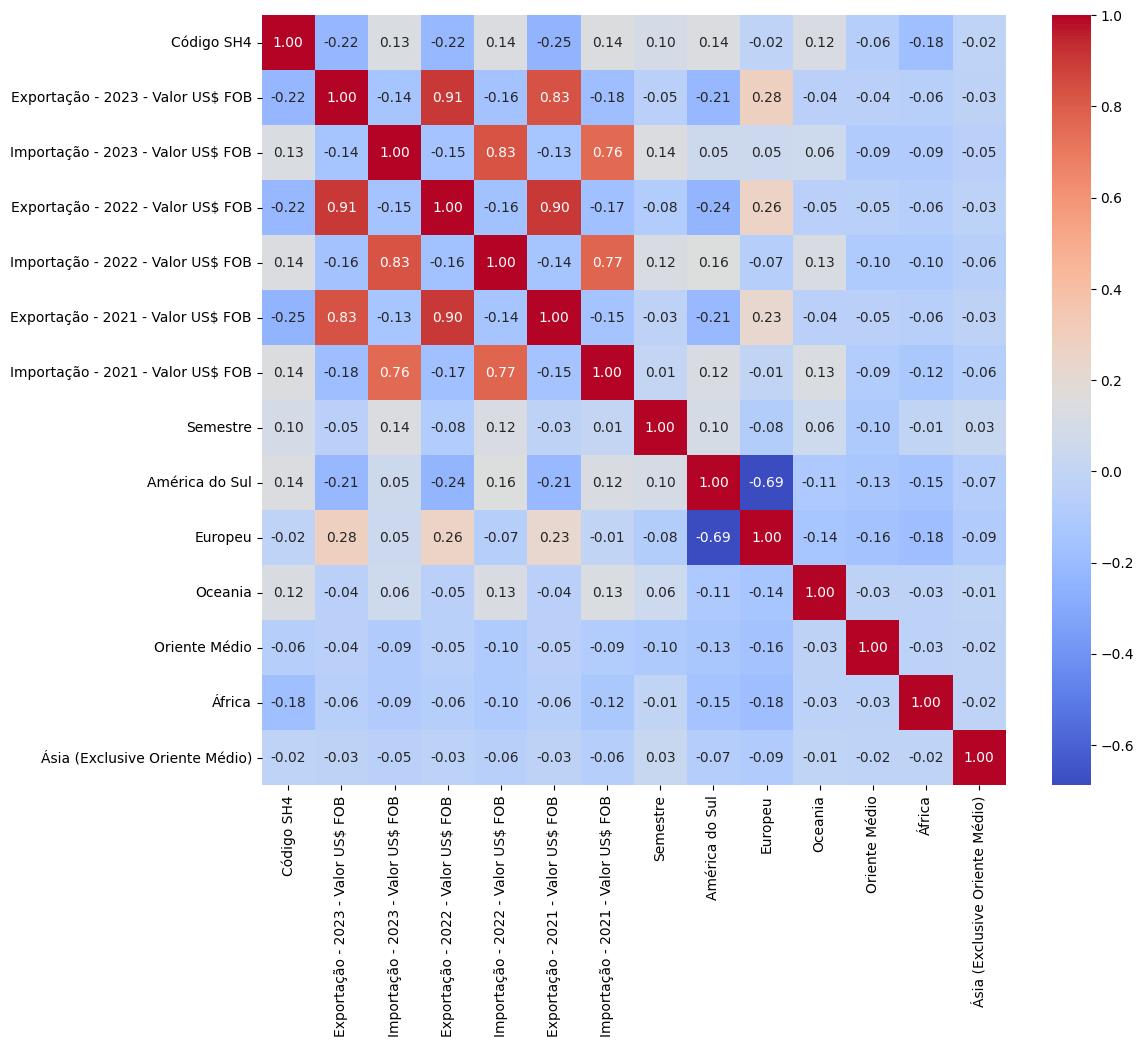

In [69]:
plt.figure(figsize=(12, 10))  
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [70]:
df.columns

Index(['Código SH4', 'Exportação - 2023 - Valor US$ FOB',
       'Importação - 2023 - Valor US$ FOB',
       'Exportação - 2022 - Valor US$ FOB',
       'Importação - 2022 - Valor US$ FOB',
       'Exportação - 2021 - Valor US$ FOB',
       'Importação - 2021 - Valor US$ FOB', 'Semestre', 'América do Sul',
       'Europeu', 'Oceania', 'Oriente Médio', 'África',
       'Ásia (Exclusive Oriente Médio)'],
      dtype='object')

In [71]:
# Teste de Shapiro-Wilk
stat, p = shapiro(df)
print('Teste de Shapiro-Wilk:')
print(f'Estatística={stat}, p-valor={p}')

Teste de Shapiro-Wilk:
Estatística=0.2917868986764587, p-valor=1.9201150830521755e-84


Através do teste podemos perceber que a distribuição não é normal

In [72]:
colunas = ['Código SH4', 'Exportação - 2023 - Valor US$ FOB',
       'Importação - 2023 - Valor US$ FOB',
       'Exportação - 2022 - Valor US$ FOB',
       'Importação - 2022 - Valor US$ FOB',
       'Exportação - 2021 - Valor US$ FOB',
       'Importação - 2021 - Valor US$ FOB']

In [73]:
scaler = MinMaxScaler()
df[colunas] = scaler.fit_transform(df[colunas])

In [74]:
df.head()

,Código SH4,Exportação - 2023 - Valor US$ FOB,Importação - 2023 - Valor US$ FOB,Exportação - 2022 - Valor US$ FOB,Importação - 2022 - Valor US$ FOB,Exportação - 2021 - Valor US$ FOB,Importação - 2021 - Valor US$ FOB,Semestre,América do Sul,Europeu,Oceania,Oriente Médio,África,Ásia (Exclusive Oriente Médio)
0,0.230769,0.110144,0.000000,0.107364,0.000000,0.094363,0.000000,1,0,0,0,0,0,0
1,0.230769,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1,0,1,0,0,0,0
2,0.230769,0.011038,0.000000,0.011728,0.000000,0.000000,0.000000,1,0,0,0,1,0,0
3,0.230769,0.896898,0.000000,0.908171,0.000000,0.937307,0.000000,1,0,1,0,0,0,0
4,0.307692,0.086485,0.230817,0.000000,0.247481,0.003070,0.165112,1,0,1,0,0,0,0


In [75]:
pca = PCA()
result = pca.fit_transform(df) 

In [76]:
pca.explained_variance_ratio_

array([0.41494934, 0.24506931, 0.0983878 , 0.06764106, 0.05114652,
       0.03527936, 0.03158533, 0.02271761, 0.01375816, 0.00761312,
       0.00467996, 0.00393093, 0.00219371, 0.00104779])

In [77]:
# variância explicada acumulada
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([41.49, 66.  , 75.84, 82.6 , 87.71, 91.24, 94.4 , 96.67, 98.05,
       98.81, 99.28, 99.67, 99.89, 99.99])

In [78]:
# 5 componentes 
pca = PCA(n_components=5) 
X_principal = pca.fit_transform(df)
df_pca = pd.DataFrame(X_principal, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [79]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_principal)
    wcss.append(kmeans.inertia_)

fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(1, 11)), y=wcss, mode='lines+markers', name='WCSS', marker=dict(symbol='circle', size=10)))

fig.update_layout(
    title='Método do Cotovelo',
    xaxis=dict(title='Número de Clusters'),
    yaxis=dict(title='WCSS'),
    width=800,
    height=500
)

fig.show()

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_principal)
df_pca['Cluster'] = clusters

centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
centroid_df['Cluster'] = range(num_clusters)

fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='Cluster',
                    title='K-Means (5 componentes principais)',
                    labels={'PC1': 'CP1', 'PC2': 'CP2', 'PC3': 'CP3'})

# Adicionar os centroides como um novo trace
centroid_trace = px.scatter_3d(centroid_df, x='PC1', y='PC2', z='PC3', color='Cluster').data[0]
fig.add_trace(centroid_trace)

fig.update_traces(marker=dict(size=5), selector=dict(mode='markers'))

fig.show()

In [80]:
inertia = kmeans.inertia_
print(f'Inércia: {inertia}')

Inércia: 54.5151777167873
